Gus Del Aguila Jr. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Taylor expansion

You can expand any continuous function as a polynomials

\\( f(x)=\sum_{n=0}^\infty \frac{1}{n!}f^{(n)}(x_0)\,(x-x_0)^n\\)

Here, \\( f^{(n)} \\) is the nth derivative and \\( x_0 \\) is the argument around which we expand the function

### 1.1 Example: Exponential function

\\( f(x)=f'(x)=f''(x)=\dots=f^{(n)}(x)=\exp(x) \\)

In [7]:
# The exponential function is one of the easiest functions to expand due to it's repeating derivative. 
import numpy as np
import math
def expTaylor(x, x0, nmax):
    # x: argument 
    # x0: argument at which the derivatives are calculated
    # nmax: n at which the series will break (terminate)
    t = 0  
    for n in range(nmax+1):
        t = t + np.exp(x0) * (x-x0) ** n / math.factorial(n)  #np.exp(x0) b/c the derivatives of exp function are all the same. 
    return t
print(expTaylor(1, 0, 10))

2.7182818011463845


In [8]:
np.exp(1) #notice how close the approximation above is to the actual value. 

2.718281828459045

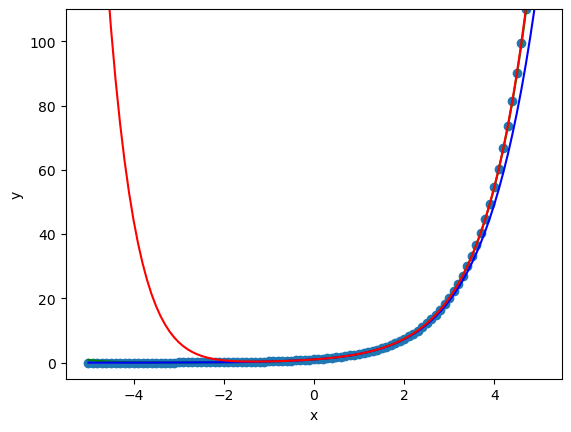

In [9]:
x_list = np.linspace(-5,5,101)
plt.scatter(x_list, np.exp(x_list))
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-5,110])

nmax= 10
plt.plot(x_list, expTaylor(x_list, 0, nmax), 'green')
plt.plot(x_list, expTaylor(x_list, -3, nmax), 'blue')
plt.plot(x_list, expTaylor(x_list, 2, nmax), 'red')

### 1.2 Example: sin function at \\(x_0 = 0\\)

\\( f(0) = f''(0) = f^{(4)}(0) = \dots = 0 \\)

\\( f'(0) = f^{(5)}(0) = f^{(9)}(0) = \dots = 1 \\)

\\( f'''(0) = f^{(7)}(0) = f^{(11)}(0) = \dots = -1 \\)

\\( \sin(x) = x - \frac{1}{3!}x^3 + \frac{1}{5!}x^5  - \frac{1}{7!}x^7 \pm \dots = \sum_{n=0}^\infty \frac{(-1)^n}{(2n+1)!}x^{2n+1}\\)

In [12]:
# The exponential function is one of the easiest functions to expand due to it's repeating derivative. 
import numpy as np
import math
def sinTaylor(x, nmax):
    # x: argument 
    # x0: x0 is always zero when derivates are always 1 or -1. 
    # nmax: n at which the series will break (terminate)
    t = 0  
    for n in range(nmax+1):
        t = t + (-1)**n * x**(2*n+1) / math.factorial(2*n+1)
    return t


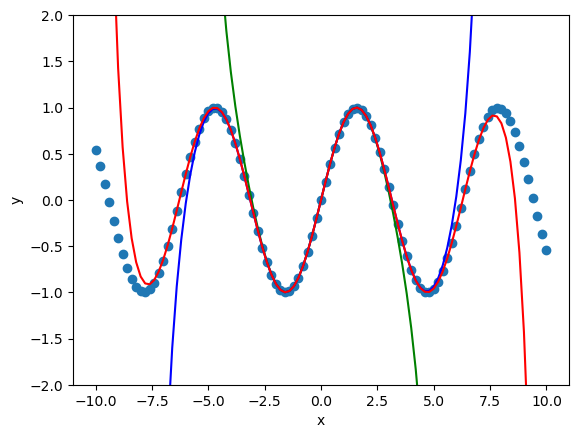

In [13]:
x_list = np.linspace(-10,10,101)
plt.scatter(x_list, np.sin(x_list))
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-2,2])


plt.plot(x_list, sinTaylor(x_list,3), 'green')
plt.plot(x_list, sinTaylor(x_list,6), 'blue')
plt.plot(x_list, sinTaylor(x_list,9), 'red')

- Accuracy of \\( \sin(10.5) \\)

In [15]:
np.sin(10.5)

-0.87969575997167

In [16]:
np.sin(10.5) - sinTaylor(10.5,50) #compare to sinTaylor expansion. This is a very small error. 

-2.844391389089651e-13

### 1.3 Implementation of a general function

Derivative (more details in separate section): \\( f'(x) = \lim_{h\rightarrow 0} \frac{f(x+h)-f(x)}{h} \\)

In [19]:
def derivative(f, x, h):
    #f is the function
    #x is the argument of the function
    #h is the step size
    return (f(x+h) - f(x)) / h

In [20]:
def func(x):                        #defining a test function
    return 2*np.sin(x)**2 + x 

In [21]:
x0 = 10.5
h = 0.1

In [22]:
func(x0)

12.04772926022427

In [23]:
derivative(func, x0, h)

2.5529969724111723

Higher derivatives: \\( f^{(n)}(x) = \lim_{h\rightarrow 0} \frac{1}{h^n}\sum_{k=0}^n(-1)^{k+n} \,\frac{n!}{k!(n-k)!} \,f(x+kh)\\)

In [25]:
def nDerivative(f, x, h, n):
    # f is the function
    # x is the argument of f
    # h is the step size
    #n is the nth derivative

    t = 0
    for k in range (n+1):
        t = t + (-1)**(k+n) * math.factorial(n) / (math.factorial(k) * math.factorial(n-k)) * f(x + k*h)
    return t / h ** n

In [26]:
nDerivative(func, x0, h, 0)

12.04772926022427

In [27]:
nDerivative(func, x0, h, 1)

2.5529969724111723

In [28]:
nDerivative(func, x0, h, 2)

-2.802754599797907

In [29]:
def taylor(f, x, x0, nmax, h):
    # f is the function
    # x is the argument of f
    # x0 is the argument at which the derivatives will be calculated.
    #nmax n at which it terminates
    # h is the step size
    #n is the nth derivative
    t = 0
    for n in range (nmax +1):
        t = t + nDerivative(f, x0, h, n) * (x - x0)**n / math.factorial(n)
    return t

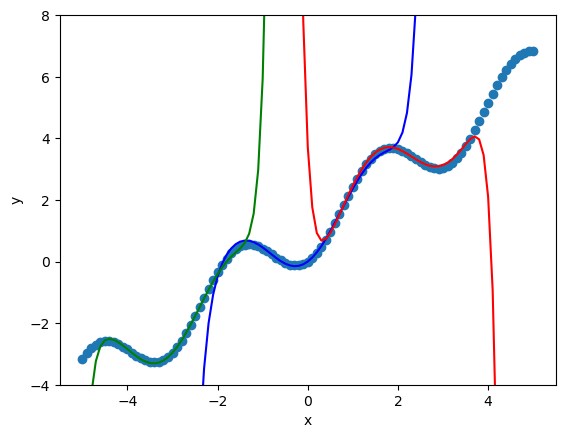

In [90]:
x_list = np.linspace(-5,5,101)
plt.scatter(x_list, func(x_list))
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-4,8])

nmax = 15
h = 0.05

plt.plot(x_list, taylor(func, x_list, 0, nmax, h ), 'blue')
plt.plot(x_list, taylor(func, x_list, 2, nmax, h ), 'red')
plt.plot(x_list, taylor(func, x_list, -3, nmax, h ), 'green')